<a href="https://colab.research.google.com/github/D-Arpann/Year-2-AI/blob/Worksheet-4/knn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from google.colab import drive

drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
print("First 5 rows:")
display(data.head())

print("\nDataset Info:")
data.info()

print("\nSummary Statistics:")
display(data.describe())

print("\nMissing values:")
print(data.isnull().sum())

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [24]:
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in invalid_zero_cols:
    data[col] = data[col].replace(0, data[col].mean())

print("\nAfter handling invalid zeros:")
print((data[invalid_zero_cols] == 0).sum())


After handling invalid zeros:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [25]:
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

In [26]:
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * (1 - test_size))
    train_idx = indices[:split]
    test_idx = indices[split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

In [27]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [28]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return np.bincount(k_labels).argmax()

In [29]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

In [30]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

In [31]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, predictions)

print(f"Accuracy (Unscaled Data): {accuracy_original:.2f}%")

Accuracy (Unscaled Data): 73.16%


Problem -2

In [15]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [17]:
X_scaled = min_max_scale(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

In [18]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy (Scaled Data): {accuracy_scaled:.2f}%")

Accuracy (Scaled Data): 71.86%


Problem-3

In [20]:
def experiment_k_values(X_train, X_test, y_train, y_test, k_range):
    accuracies = []
    times = []

    for k in k_range:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k)
        end = time.time()

        accuracies.append(compute_accuracy(y_test, preds))
        times.append(end - start)

    return accuracies, times

In [21]:
k_values = range(1, 16)

acc_orig, time_orig = experiment_k_values(X_train, X_test, y_train, y_test, k_values)
acc_scaled, time_scaled = experiment_k_values(X_train_s, X_test_s, y_train_s, y_test_s, k_values)

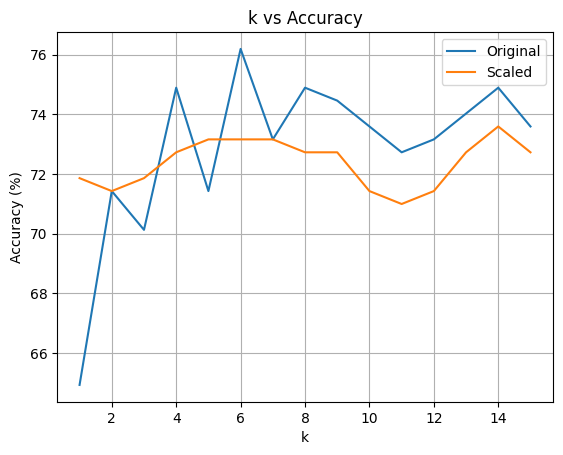

In [22]:
plt.figure()
plt.plot(k_values, acc_orig, label="Original")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()

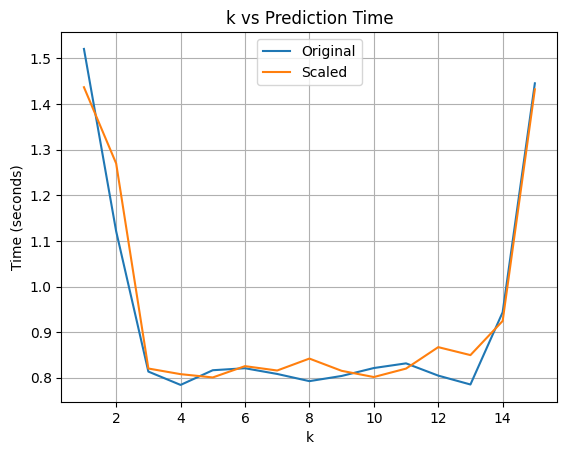

In [23]:
plt.figure()
plt.plot(k_values, time_orig, label="Original")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Prediction Time")
plt.legend()
plt.grid()
plt.show()